<a href="https://colab.research.google.com/github/na0260/machine-learning-lab/blob/main/ProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer classification comparison between logistic regression and MLP**

In [122]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [123]:
dataset= pd.read_csv("/content/data.csv")

In [124]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [125]:
X.dropna(inplace=True)

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
y_value_counts = y.value_counts()
print(y_value_counts)

B    357
M    212
Name: diagnosis, dtype: int64


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=30)

In [129]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [130]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.9736842105263158


In [131]:
df = pd.DataFrame({"predicted": y_pred,"actual": y_test})

In [132]:
# Implementing multilayer perceptron

In [133]:
from sklearn.neural_network import MLPClassifier

In [134]:
model =MLPClassifier(
    activation='relu',
    max_iter=20000,
    learning_rate_init=0.001,
    hidden_layer_sizes=(4),
    random_state=30
)
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=4, max_iter=20000, random_state=30)

In [135]:
y_pred_mlp = model.predict(X_test)
accuracy_mlp = model.score(X_test,y_test)
print('Score: ', accuracy_mlp)
df_mlp = pd.DataFrame({"predicted": y_pred_mlp,"actual": y_test})

Score:  0.9912280701754386


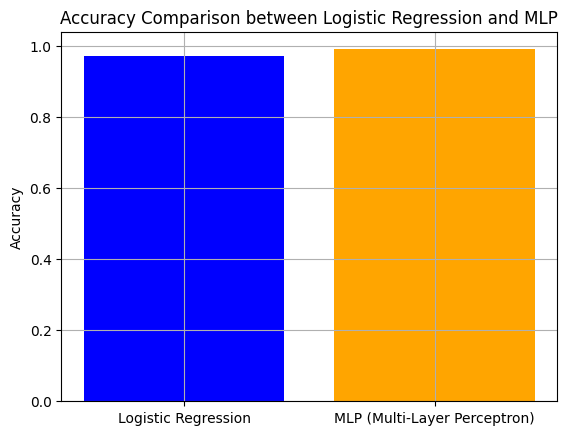

In [136]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'MLP (Multi-Layer Perceptron)']
accuracies = [accuracy, accuracy_mlp]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Logistic Regression and MLP')
plt.grid()
plt.show()